# Machine learning for medicine
## Linear Regression 2: Finding lines that explain our data, when there's a *lot*

## Overview
Take a look at basic regression in our [previous notebook]().
In this notebook we're going to really start exploring the power of linear regression and how machine learning boosts it.


The real power of linear regression is clear when we've got way, way more than just two variables.
In this notebook we'll start with a brief intro of linear regression with two variables, then show how it can work with many more, and finally demonstrate the power of machine learning in messy data.

As always, there's code and interactive widgets all along the way.

### Code Setup

In [105]:
# The big library for doing math + data in python
import numpy as np

# A big library that has a lot of useful functions for scientific use of python
import scipy
import networkx as nx

# The main library for plotting
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")
matplotlib.rcParams['figure.figsize'] = [15, 10]

# The main library used for statistics
import scipy.stats as stats

# The library we're going to use for our linear regression
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet

# Libraries that let us use interactive widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# Misc stuff related to cleaning up code and displaying results in a pretty way
#from example_systems import *
from IPython.display import Markdown as md

## Linear Regression (advanced)
We're now going to try to do a linear regression model in many, many more dimensions.

Let's consider something like the clotting cascade.

<div>
    <center>
<img src="imgs/clotting_cascade.png" width="500"/>
    </center>
</div>

### COMMENT
Look at PT and PTT, see which "factors" correlate and anticorrelate with -> regression (VS PCA for the PCA notebook)
maybe even add bleeding time ->

NO NEED FOR PCA -> just have the "factors" that show up in the regression -> "what a coincidence, these are all PT".

Focus entirely on PT vs PTT separately -> 

There's a *lot* going on.

In [106]:
pt_num = 100
CoCa = nx.Graph()
CoCa.add_edge('XII','XI')
CoCa.add_edge('XI','IX')
CoCa.add_edge('IX','X')
CoCa.add_edge('II','VIII')
CoCa.add_edge('VIII','X')
CoCa.add_edge('VII','X')
CoCa.add_edge('X','II')
CoCa.add_edge('II','V')
CoCa.add_edge('V','II')
CoCa.add_edge('II','XIII')
CoCa.add_edge('II','I')
CoCa.add_edge('I','F')
CoCa.add_edge('XIII','F')

CoCa.add_edge('tt','VII')
CoCa.add_edge('sc','XII')

cross_link = nx.adjacency_matrix(CoCa).todense()

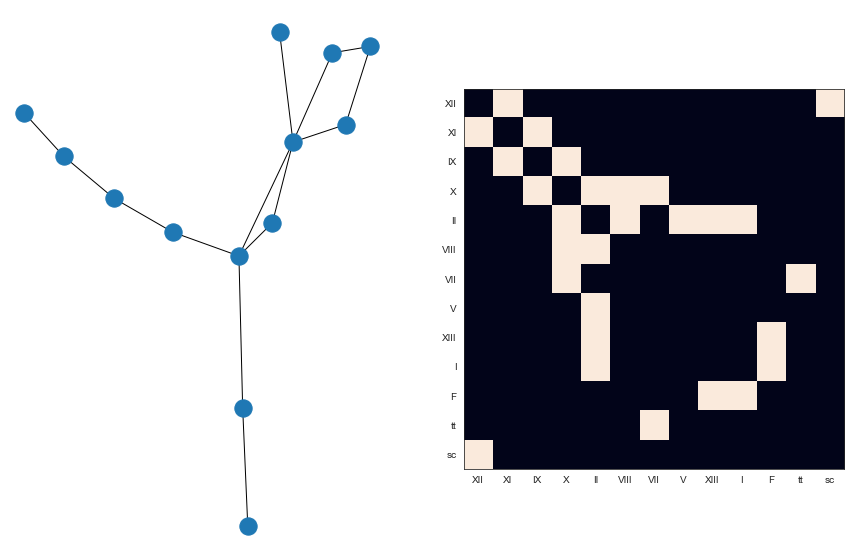

In [107]:
plt.figure()
plt.subplot(121)
nx.draw(CoCa)

plt.subplot(122)
plt.imshow(cross_link)
plt.xticks(np.arange(0,13),CoCa.nodes())
plt.yticks(np.arange(0,13),CoCa.nodes())
plt.show()

In [152]:
#generate our timeseries
tlen = 10
X_dyn_range = 10
y_measure_noise = 5

X = np.zeros((len(CoCa.nodes()),tlen))
#X = np.tile(np.random.uniform(size=(len(CoCa.nodes()),1)),(1,tlen))
X += np.random.multivariate_normal(np.zeros(len(CoCa.nodes())),cross_link,size=tlen).T
X += np.random.normal(0,X_dyn_range,size=X.shape)
print(X.shape)

# This is the equation we're using to generate our "PT"
#y = 0.3 * X[0,:] + 0.6 * X[5,:] - 0.3 * X[9,:]

#Below is just a more elegant way of putting it
output_map = np.array([0.3,0,0,0,0,0.6,0,0,0,-0.3,0,0,0])

y = np.dot(output_map.T,X)
y += np.random.normal(0,y_measure_noise,size=y.shape)

(13, 10)


<ipython-input-152-f4ea1408ca54>:8: RuntimeWarning: covariance is not positive-semidefinite.
  X += np.random.multivariate_normal(np.zeros(len(CoCa.nodes())),cross_link,size=tlen).T


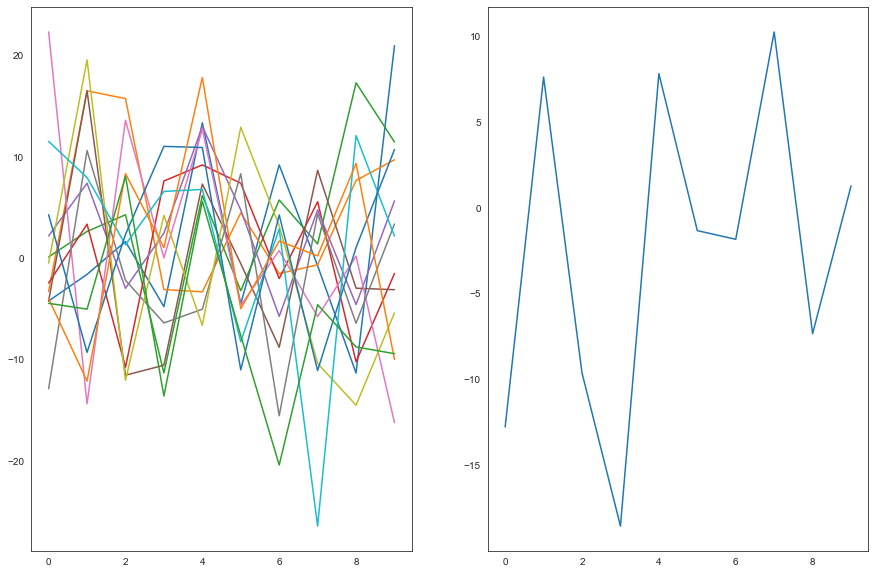

In [153]:
plt.figure()
plt.subplot(1,2,1)
plt.plot(X.T)

plt.subplot(1,2,2)
plt.plot(y)
plt.show()

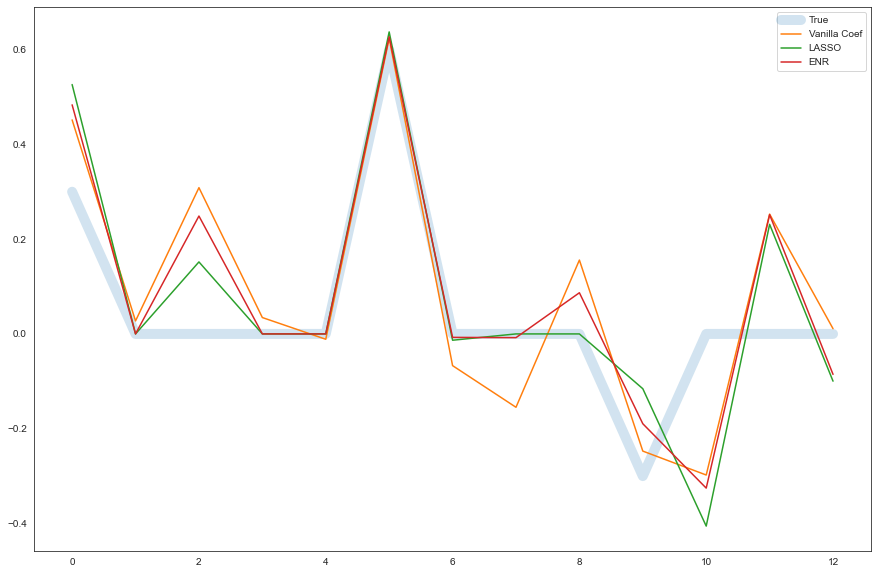

In [154]:
reg = LinearRegression(fit_intercept=True).fit(X.T,y)
mod_reg = Lasso(alpha=1.0).fit(X.T,y)
en_reg = ElasticNet(alpha=0.9,l1_ratio=0.4).fit(X.T,y)

plt.plot(output_map,linewidth=10,alpha=0.2,label='True')
plt.plot(reg.coef_,label='Vanilla Coef')

plt.plot(mod_reg.coef_,label='LASSO')
plt.plot(en_reg.coef_,label='ENR')
plt.legend()